Medical Cost Personal Insurance Project

Import Necessary Libraries
- This is a Regression problem, thus, we will be importing regression libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from xgboost import XGBRegressor

Import Dataset from GitHub

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, we can begin analysing our dataset:
- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(1337, 7)

- From abaove analysis, we can note there are 1337 unique rows with 7 columns and No Null values.
- We can also note that our SD in Age and BMI column is large (data may be skewed)

Now, before going further, we can note there are 3 Categorical columns: sex, smoker and region
We need to encode these columns.
- I will be using get_dummies for this

In [9]:
categorical_columns = ['sex','smoker','region']
df1 = pd.get_dummies(df[categorical_columns],drop_first=True)
df1

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [10]:
df = df.join(df1)
df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [11]:
df.drop(columns = categorical_columns,axis=1,inplace = True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Now, that we have encoded our categorical columns, we can begin visualizing our dataset

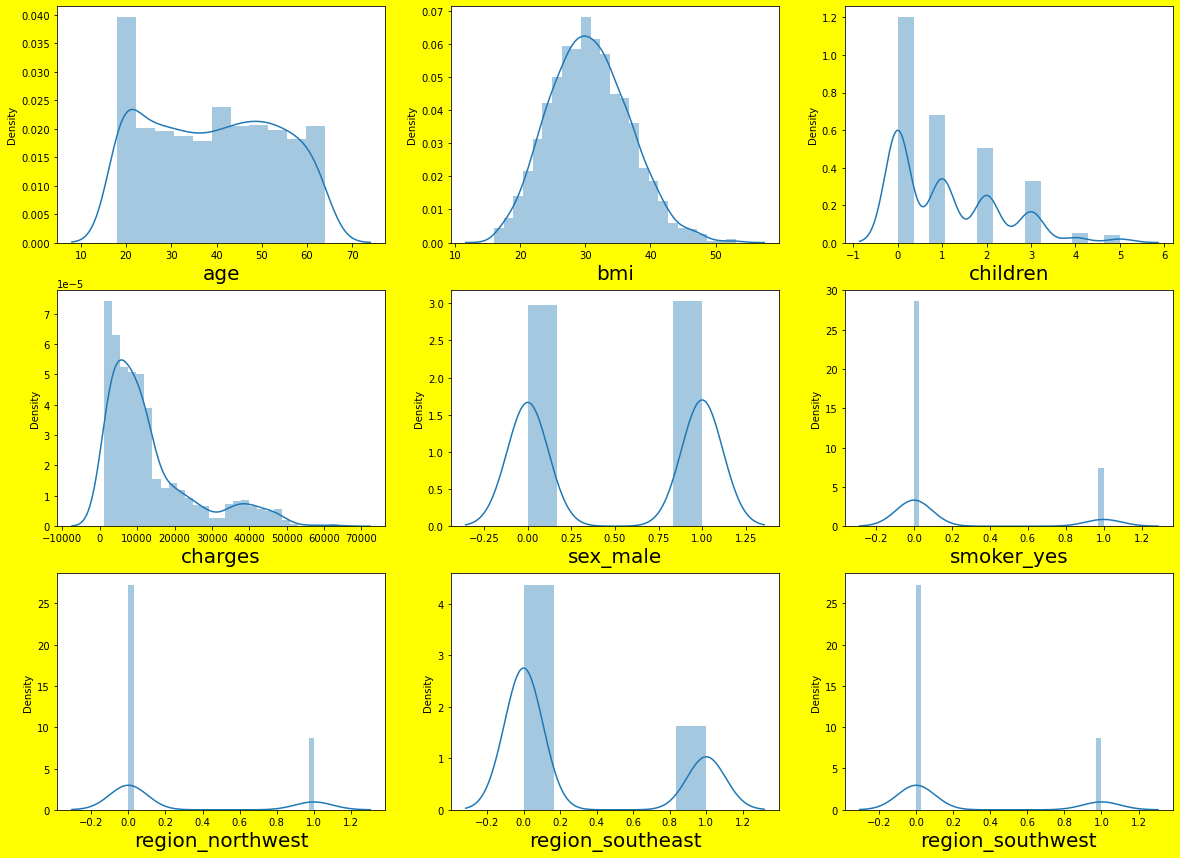

In [12]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Our dataset does not seem very skewed, so we can move on to checing the correlation using heatmap

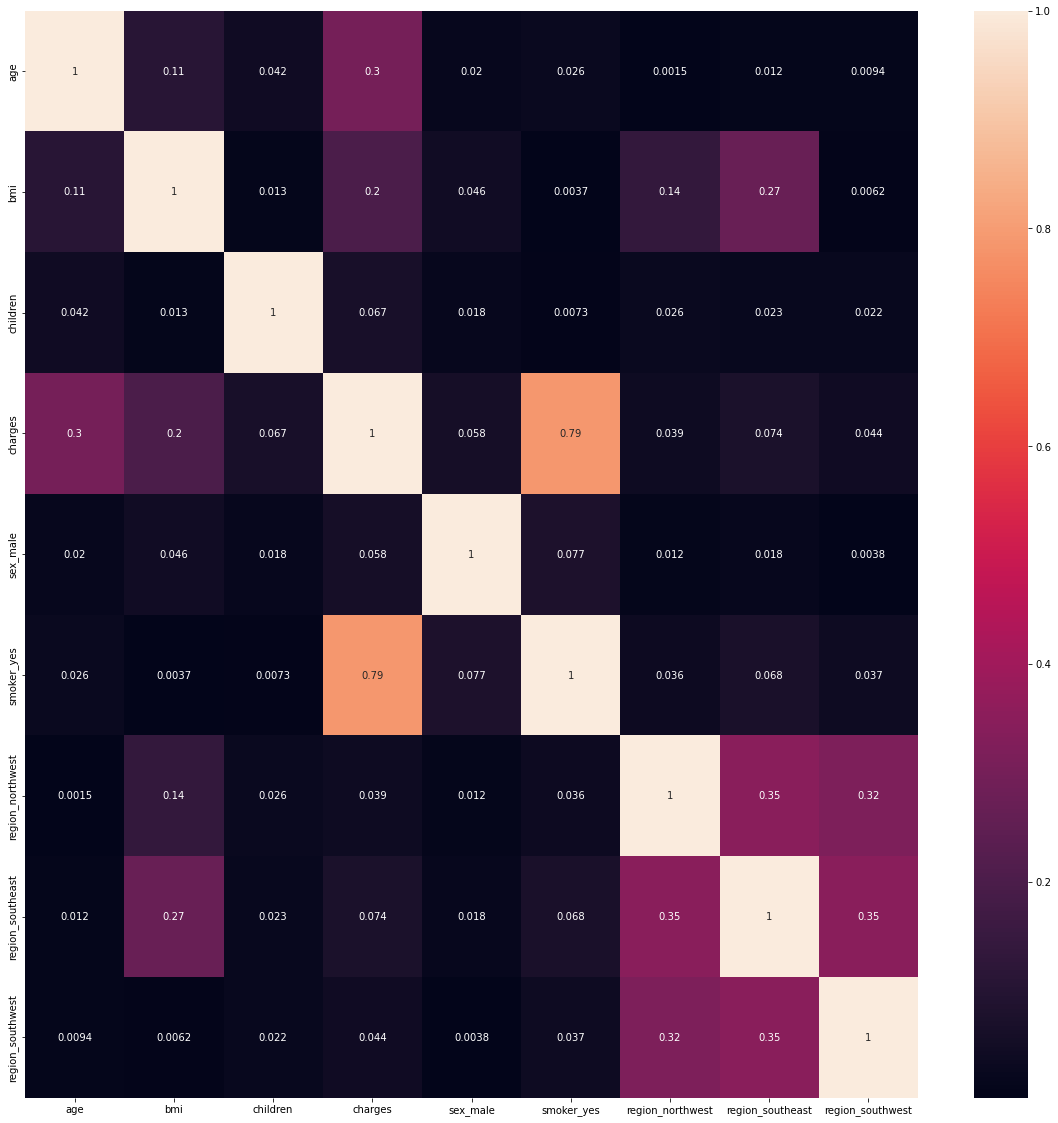

In [13]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

- We can note that Smoking seems to have a high correlation with Charges, but we do not see any other major correlation otherwise so no need to drop any columns.

We can move on to seperating Target and Feature columns

In [14]:
x = df.drop(columns = ['charges'])
y = df.charges

In [15]:
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [16]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

Check Scatter Plot to again see relation with Target

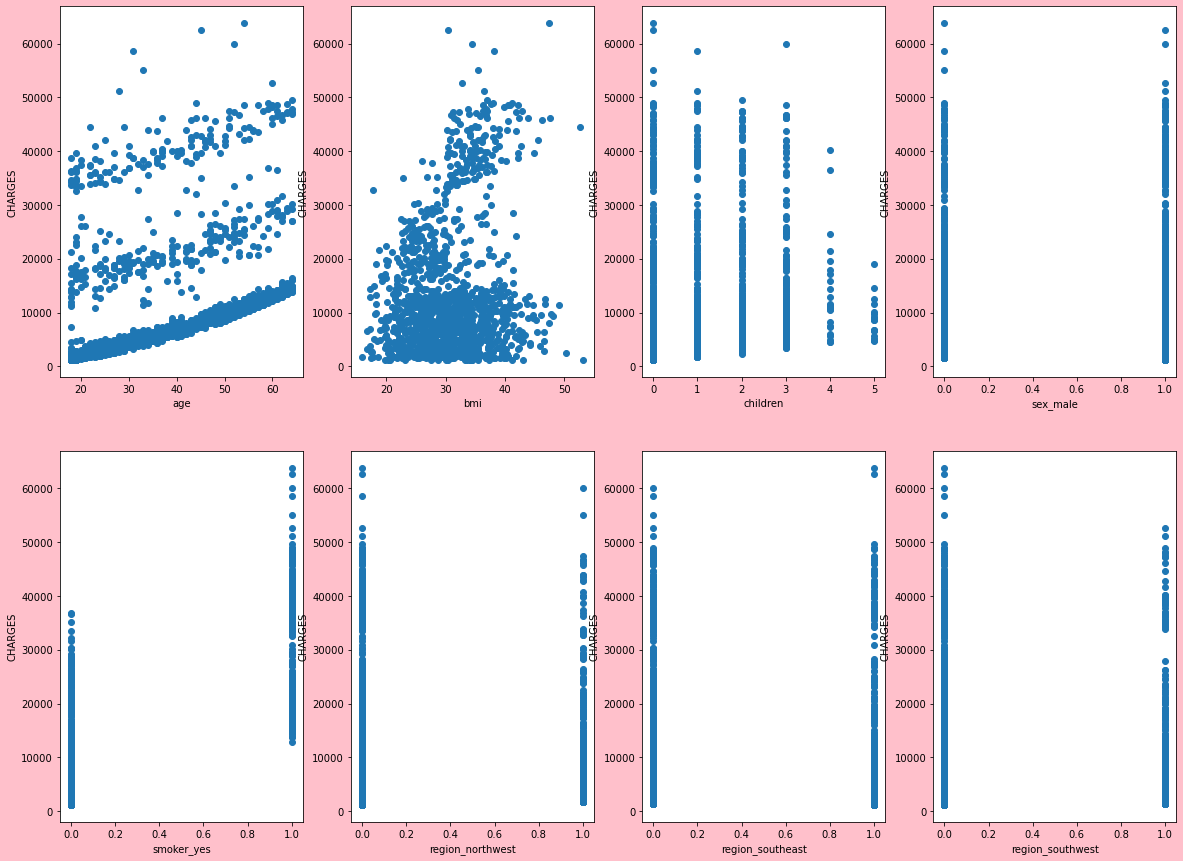

In [17]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('CHARGES',fontsize=10)
    plotnumber+=1
plt.show()

Again, no major indicator to drop any column

We will now scale our feature columns

In [19]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.44041773, -0.45315959, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.50942165, -0.07944162, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-0.79935006,  0.3831546 ,  1.58014347, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-1.29795825, -0.79752426, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [ 1.55123139, -0.26129928, -0.90923416, ...,  1.76820338,
        -0.61163774, -0.56669767]])

We can now begin our Model Training and Testing

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=69)

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test,pred)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_scaled,y,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test,pred))
        print('MSE = ',mean_squared_error(y_test,pred))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))

In [24]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 76.08%

 ======TESTING RESULT======
Accuracy Score: 71.24%
Cross Validation Score =  0.7467384760760104
MAE =  4512.776080731105
MSE =  45139747.01846493
RMSE =  6718.61198600313


We can note that we are getting training accuracy of 76% and Testing accuracy of 71.2% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [25]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [26]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Testing accuracies for other models

In [27]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7123621895847683
0.7651988093723373
0.7138268467701567
0.813307405831615
0.8053960494441192


From above accuracies we can note:
- Random Forest and XGB are giving us the best accuracies.
- KNN is also giving decent accuracy.
- Linear Regression and Decision Tree are giving the lowest accuracy amongst the lot.

Now we need to check for overfitting
- I'll be using Ridge regularization for this

In [29]:
from sklearn.linear_model import Ridge, RidgeCV

In [30]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [31]:
ridgecv.alpha_

0.001

In [32]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [33]:
ridge_model.score(x_test,y_test)

0.7123622000260257

We can conclude the model is not overfitting as it is giving very similar score to Linear Regression R2 Score